# To do data analysis and explore the youtube dislikes dataset using numpy and pandas libraries and drive meaningful insights by performing Exploratory data analysis.


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

In [27]:
import os
os.getcwd()

'C:\\Users\\krish\\Data Analytics projects'

In [28]:
# Reading the data set
df = pd.read_csv('youtube_dislike_dataset.csv')
df

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
0,ZW1KzMmmfBI,"Day - 05 ll ll ( ) ll ,",UCUUIz69kK3Ib5bD4hWLKAwA,Pandit Pradeep Ji Mishra Sehore Wale,04-12-2021 13:18,498594,14193,883,1118,Mahashivratri Bhajans Shiv Chalisa Shiv Mahima...,"Day - 05 ll ll ( ) ll , \n\n\n\nPleas...",...
1,3SLRQ_vLYvg,Nodirbek Hayitov - Moshennik Otaxon (hajviy ko...,UCNYRMxwq7oADgxklM-RO3-g,Nodirbek Hayitov,06-03-2021 14:00,267295,2856,162,175,Nodirbek Hayitov Nodir lo'li,Video yoqdimi? unda Nodirbek Hayitov kanalga o...,...
2,5jykokUl9B0,Nandini - Episode 363 | 17 Nov 2020 | Sun Bang...,UCnO0Km5GnYKBVUEUkHsNQeA,Sun Bangla,19-11-2020 03:30,4091699,26188,4679,899,Bengali serials Sun Bangla Serials Sun Bangla ...,Watch the Full Episode of the Super hit Serial...,...
3,uf7Iyo8o8b4,", 4, ! Chery Tiggo 7 Pro",UCu5JLVZtQbpCtFYNnl-QzWA,Clickoncar,06-09-2020 08:00,632076,10552,1186,1246,Clickoncar Chery Tiggo 7 Pro 7 chery tigg...,"7 KIA SELTOS! Toyota RAV4, Mitsubis...",...
4,5wcyjORae1A,|| 123 GO!,UCMZKCZ23VTy_D743H56iuJw,123 GO! Russian,17-01-2021 15:03,699848,10299,847,338,123go 123go!,". . ! \n\n , ?...",...
...,...,...,...,...,...,...,...,...,...,...,...,...
37417,x7WtabxoTdQ,:BTSFilm out 90202142,UCTDMT3aL30noTVFgNPA9XtQ,MOVIE,15-02-2021 19:00,2275095,96958,552,0,STUDIO DRAGON ASTORY BTS...,90\nBTSFilm out\nback number\n\nFilm outback ...,NaN
37418,yBfamIFpucw,A QUEDA,UCCt8cGO1NfZgi0XO_kbsesw,Gloria Groove - Topic,15-10-2021 00:01,4890598,119549,5154,0,Gloria Groove Lukinhas Pablo Bispo Ruxell A QUEDA,Provided to YouTube by The Orchard Enterprises...,NaN
37419,yiWErhQbUho,"Hanuman Chalisa I GULSHAN KUMAR I HARIHARAN,...",UCaayLD9i5x4MmIoVZxXSv_g,T-Series Bhakti Sagar,05-01-2021 00:30,446713,8561,1047,857,Hanuman Chalisa Hanuman Chalisa Gulshan Kumar ...,SUBSCRIBE:http://www.youtube.com/tseriesbhakti...,NaN
37420,ylPCxAwqTLk,. 2 - 2D | | 2021!,UC5A-Wp9ujcr5g9sYagAafEA,TVSmeshariki,06-08-2021 11:59,693473,8237,783,0,2 2d 2d ...,": . , . , . , - . , ...",NaN


In [29]:
# Retrieve top 5 and bottom 5 records
df.head()

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
0,ZW1KzMmmfBI,"Day - 05 ll ll ( ) ll ,",UCUUIz69kK3Ib5bD4hWLKAwA,Pandit Pradeep Ji Mishra Sehore Wale,04-12-2021 13:18,498594,14193,883,1118,Mahashivratri Bhajans Shiv Chalisa Shiv Mahima...,"Day - 05 ll ll ( ) ll , \n\n\n\nPleas...",...
1,3SLRQ_vLYvg,Nodirbek Hayitov - Moshennik Otaxon (hajviy ko...,UCNYRMxwq7oADgxklM-RO3-g,Nodirbek Hayitov,06-03-2021 14:00,267295,2856,162,175,Nodirbek Hayitov Nodir lo'li,Video yoqdimi? unda Nodirbek Hayitov kanalga o...,...
2,5jykokUl9B0,Nandini - Episode 363 | 17 Nov 2020 | Sun Bang...,UCnO0Km5GnYKBVUEUkHsNQeA,Sun Bangla,19-11-2020 03:30,4091699,26188,4679,899,Bengali serials Sun Bangla Serials Sun Bangla ...,Watch the Full Episode of the Super hit Serial...,...
3,uf7Iyo8o8b4,", 4, ! Chery Tiggo 7 Pro",UCu5JLVZtQbpCtFYNnl-QzWA,Clickoncar,06-09-2020 08:00,632076,10552,1186,1246,Clickoncar Chery Tiggo 7 Pro 7 chery tigg...,"7 KIA SELTOS! Toyota RAV4, Mitsubis...",...
4,5wcyjORae1A,|| 123 GO!,UCMZKCZ23VTy_D743H56iuJw,123 GO! Russian,17-01-2021 15:03,699848,10299,847,338,123go 123go!,". . ! \n\n , ?...",...


In [30]:
df.tail()

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
37417,x7WtabxoTdQ,:BTSFilm out 90202142,UCTDMT3aL30noTVFgNPA9XtQ,MOVIE,15-02-2021 19:00,2275095,96958,552,0,STUDIO DRAGON ASTORY BTS...,90\nBTSFilm out\nback number\n\nFilm outback ...,NaN
37418,yBfamIFpucw,A QUEDA,UCCt8cGO1NfZgi0XO_kbsesw,Gloria Groove - Topic,15-10-2021 00:01,4890598,119549,5154,0,Gloria Groove Lukinhas Pablo Bispo Ruxell A QUEDA,Provided to YouTube by The Orchard Enterprises...,NaN
37419,yiWErhQbUho,"Hanuman Chalisa I GULSHAN KUMAR I HARIHARAN,...",UCaayLD9i5x4MmIoVZxXSv_g,T-Series Bhakti Sagar,05-01-2021 00:30,446713,8561,1047,857,Hanuman Chalisa Hanuman Chalisa Gulshan Kumar ...,SUBSCRIBE:http://www.youtube.com/tseriesbhakti...,NaN
37420,ylPCxAwqTLk,. 2 - 2D | | 2021!,UC5A-Wp9ujcr5g9sYagAafEA,TVSmeshariki,06-08-2021 11:59,693473,8237,783,0,2 2d 2d ...,": . , . , . , - . , ...",NaN
37421,zCkfx65Vjw4,. Broken Vow - - . - 8,UCXBIIbGe37lKXFHdM050f2w,The Voice Kids Russia/,12-02-2021 20:37,665998,15913,225,0,the voice kids 7 7 ...,Broken Vow. Lara Fabian 1999 . ...,NaN


In [31]:
# Check the info of the dataframe and write your inferences on data types and shape of the dataset.
df.shape

(37422, 12)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37422 entries, 0 to 37421
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       37422 non-null  object
 1   title          37422 non-null  object
 2   channel_id     37422 non-null  object
 3   channel_title  37422 non-null  object
 4   published_at   37422 non-null  object
 5   view_count     37422 non-null  int64 
 6   likes          37422 non-null  int64 
 7   dislikes       37422 non-null  int64 
 8   comment_count  37422 non-null  int64 
 9   tags           37422 non-null  object
 10  description    37422 non-null  object
 11  comments       37264 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.4+ MB


# Observation
There are total 37422 rows and 12 columns. In the dataset there are 8 columns of string and 4 columns of integers. There are also null values in column- comments.

In [33]:
# Check for the Percentage of the missing values and drop or impute them.
df.isnull().sum()/37422*100

video_id         0.000000
title            0.000000
channel_id       0.000000
channel_title    0.000000
published_at     0.000000
view_count       0.000000
likes            0.000000
dislikes         0.000000
comment_count    0.000000
tags             0.000000
description      0.000000
comments         0.422212
dtype: float64

In [34]:
df.dropna(inplace = True)

In [35]:
# Again checking null values
df.isnull().sum()/37422*100

video_id         0.0
title            0.0
channel_id       0.0
channel_title    0.0
published_at     0.0
view_count       0.0
likes            0.0
dislikes         0.0
comment_count    0.0
tags             0.0
description      0.0
comments         0.0
dtype: float64

In [11]:
# Check the statistical summary of both numerical and categorical columns and write your inferences.
summary = df.describe()
summary['Skew'] = df.skew()
summary

,view_count,likes,dislikes,comment_count,Skew
count,3.726400e+04,3.726400e+04,3.726400e+04,3.726400e+04,NaN
mean,5.710821e+06,1.672867e+05,4.996434e+03,9.966953e+03,NaN
std,2.431304e+07,5.384931e+05,3.075194e+04,1.173465e+05,NaN
min,2.036800e+04,2.200000e+01,3.000000e+00,1.000000e+00,NaN
25%,5.141305e+05,1.331725e+04,2.827500e+02,9.140000e+02,NaN
50%,1.321860e+06,4.255600e+04,7.980000e+02,2.347000e+03,NaN
75%,3.674527e+06,1.309665e+05,2.466250e+03,6.212000e+03,NaN
max,1.322797e+09,3.183768e+07,2.397733e+06,1.607103e+07,NaN


In [12]:
summary = df.describe(include='object')
summary 

,video_id,title,channel_id,channel_title,published_at,tags,description,comments
count,37264,37264,37264,37264,37264,37264,37264,37264
unique,37264,36958,10891,10813,36617,28705,35479,37264
top,sa0d1M_kIyI,www,UCNAf1k0yIjyGu3k9BwAg3lg,Sky Sports Football,2020-10-16 04:00:10,,,For your chance to win a rare 2005 Ford GT plu...
freq,1,21,533,533,6,3808,587,1


# Observation
There is huge difference between min and max of view_count, likes, dislikes and comment_count this mean range is good and there can be outliers. The 'DyKQ7qtTJag' is the top video_id on youtube. The mean and median of view_count, likes, dislikes and comment_count are far away from each other indicates data is not symmetrical distributed. The standard deviation indicates that values are widely dispersed from mean.

In [13]:
#  Convert datatype of column published_at from object to pandas datetime

df['published_at'] = pd.to_datetime(df['published_at'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37264 entries, 0 to 37421
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       37264 non-null  object        
 1   title          37264 non-null  object        
 2   channel_id     37264 non-null  object        
 3   channel_title  37264 non-null  object        
 4   published_at   37264 non-null  datetime64[ns]
 5   view_count     37264 non-null  int64         
 6   likes          37264 non-null  int64         
 7   dislikes       37264 non-null  int64         
 8   comment_count  37264 non-null  int64         
 9   tags           37264 non-null  object        
 10  description    37264 non-null  object        
 11  comments       37264 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 3.7+ MB


In [15]:
# Create a new column as 'published_month' using the column published_at (display the months only)
df['published_month'] = pd.DatetimeIndex(df['published_at']).month

In [16]:
df.head()

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,published_month
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi...",7
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...,6
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...,9
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...,3
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...,12


In [17]:
# Replace the numbers in the column published_month as names of the months i,e., 1 as 'Jan', 2 as 'Feb' and so on.....

df['published_month'] = df['published_month'].replace({1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
df

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,published_month
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi...",July
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...,June
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...,Sept
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...,March
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37417,zzd4ydafGR0,Lil Tjay - Calling My Phone (feat. 6LACK) [Off...,UCEB4a5o_6KfjxHwNMnmj54Q,Lil Tjay,2021-02-12 05:03:49,120408275,2180780,35871,81360,Lil Tjay Steady Calling My Phone Calling My Ph...,"Official video for ""Calling My Phone"" by Lil T...",'DESTINED 2 WIN' OUT NOW !! https://liltjay.ln...,Feb
37418,zziBybeSAtw,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,2021-01-16 05:39:05,2841917,20759,1049,2624,NBA G League Basketball game-0022000187 Lakers...,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,Montrezl Harrell is going crazy with the rebou...,Jan
37419,zzk09ESX7e0,[MV] (MAMAMOO) - Where Are We Now,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,2021-06-02 09:00:10,13346678,720854,4426,90616,MAMAMOO WAW WAW MAMAMOO WAW Where Are We Now...,[MV] (MAMAMOO) - Where Are We Now\n\nInstagra...,I honestly do not know why this song hit so ha...,June
37420,zzmQEb0Em5I,FELLIPE ESCUDERO- Master Podcast #12,UC8NjnNWMsRqq11NYvHAQb1g,Master Podcast,2020-10-20 20:59:30,252057,19198,1234,1471,master masterpodcast lord lord vinheteiro z z ...,DOCTOR HAIR\nhttps://www.thedoctorhair.com/?fb...,Foi um prazer passar esta tarde com vocs debat...,Oct


In [18]:
# Find the number of videos published each month and arrange the months in a decreasing order based on the video count.
df.groupby(by = 'published_month')[['published_month']].count().sort_index(ascending = False)

,published_month
published_month,
Sept,4854
Oct,4976
Nov,4821
May,2073
March,2248
June,2305
July,2331
Jan,2099
Feb,2125


In [19]:
df.groupby(by = 'published_month')[['published_month']].count().sort_index(ascending = False).rename({'published_month':'count'}, axis = 1)

,count
published_month,
Sept,4854
Oct,4976
Nov,4821
May,2073
March,2248
June,2305
July,2331
Jan,2099
Feb,2125


In [20]:
#  Find the count of unique video_id, channel_id and channel_title
df['video_id'].nunique()

37264

In [21]:
df['channel_id'].nunique()

10891

In [22]:

df['channel_title'].nunique()

10813

In [23]:
# Find the top10 channel names having the highest number of videos in the dataset and the bottom10 having lowest number of videos.

df_top_channel = df.groupby(by = 'channel_title')['video_id'].nunique().sort_values(ascending = False)
df_top_channel.head(10)

channel_title
Sky Sports Football    533
The United Stand       301
BT Sport               246
NBA                    209
NFL                    162
WWE                    122
SSSniperWolf            99
SSundee                 98
FORMULA 1               87
NHL                     86
Name: video_id, dtype: int64

In [24]:
df_bottom_channel = df.groupby(by = 'channel_title')['video_id'].nunique().sort_values(ascending = True)
df_bottom_channel.head(10)

channel_title
   SilverName                   1
Miniatur Wunderland             1
MiniBloxia                      1
Mini Muka                       1
Mini Ladd                       1
MindYourLogic                   1
Mind Body Tonic With Dr Sita    1
Mimi Ar                         1
Millyz                          1
Milkair                         1
Name: video_id, dtype: int64

In [25]:
df.head()

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,published_month
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi...",July
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...,June
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...,Sept
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...,March
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...,Dec


In [26]:
#  Find the title of the video which has the maximum number of likes and the title of the video having minimum likes and write your inferences.
x = df.loc[df['likes'].idxmax(), 'title']
x

"BTS () 'Dynamite' Official MV"

In [27]:
x = df.loc[df['likes'].idxmin(), 'title']
x

'Leading the Charge | Circle K'

# Observation
"BTS () 'Dynamite' Official MV" is the title of the video that gained most of likes as compared to other videos from August 2020 to December 2021(as per data) for the USA, Canada, and Great Britain.
'Kim Kardashian\'s Must-See Moments on "Saturday Night Live" | E! News' is the title of video that have minumum likes as compared to other videos from August 2020 to December 2021(as per data) for the USA, Canada, and Great Britain.

In [28]:
# Find the title of the video which has the maximum number of dislikes and the title of the video having minimum dislikes and write your inference
y = df.loc[df['dislikes'].idxmax(), 'title']
y

'Cuties | Official Trailer | Netflix'

In [29]:
y = df.loc[df['dislikes'].idxmin(), 'title']
y

'Tims For Good: A Taste Of The Familiar'

# Observation
'Cuties | Official Trailer | Netflix' is the title of video that have maximum dislikes or hated by the citizens of USA, Canada, and Great Britain from August 2020 to December 2021(as per data).
'Kim Kardashian\'s Must-See Moments on "Saturday Night Live" | E! News' is the title of video that have minumun dislikes as compared to other videos. We can assume that the content of the video is not hated by many of the citizens. 

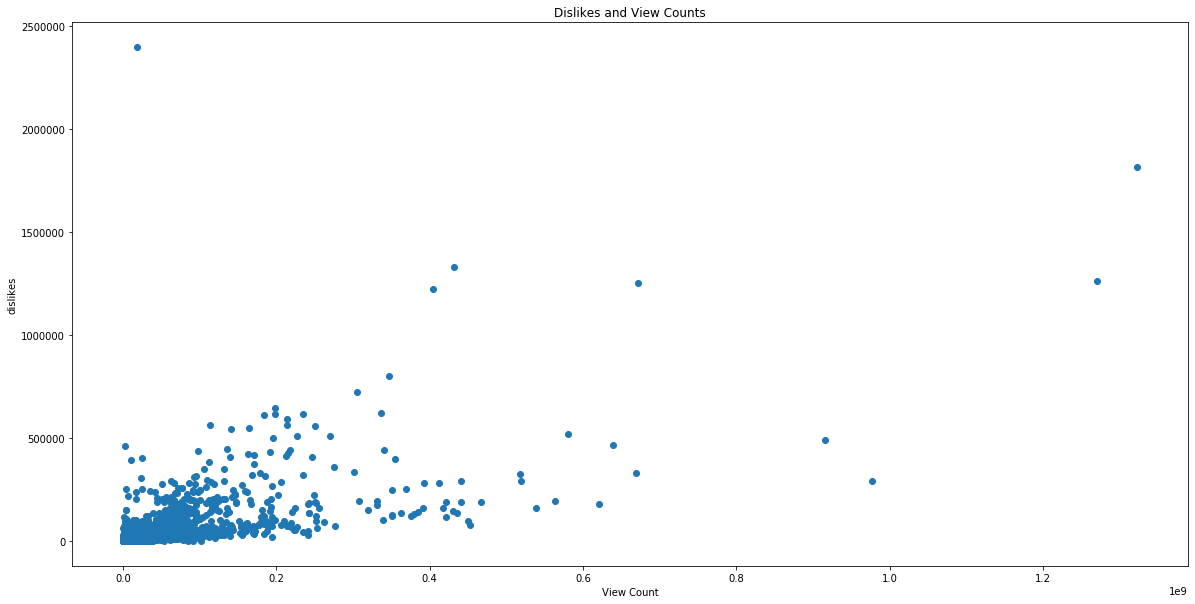

In [30]:
# Does the number of views have any effect on how many people disliked the video? Support your answer with a metric and a plot.
plt.figure(figsize = (20,10))
plt.scatter(df['view_count'], df['dislikes'])
plt.xlabel('View Count')
plt.ylabel('dislikes')
plt.title('Dislikes and View Counts')
plt.show()

In [31]:
# Display all the information about the videos that were published in January, and mention the count of videos that were published in January.
jan_video = df[df['published_month']== "Jan"]
jan_video.head()

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,published_month
27,-2Gwm7QfBnE,Q&A With Naisha,UCYwNMbogQFzMccPSuy-pPWg,MianTwins,2021-01-21 00:05:47,872372,38626,239,621,,Hey Guys!!! this has been the most requested v...,I feel like Nate and Aishas personality match ...,Jan
48,-4sfXSHSxzA,SURPRISING BRENT WITH HIS TIKTOK CRUSH!!,UCPpATKqmMV-CNRNWYaDUwiA,Alexa Rivera,2021-01-16 21:40:04,6504784,262477,5779,7907,,He had no idea! Thank you guys so much for wat...,Thank you guys for watching and don't forget t...,Jan
95,-AJD1Fc5rpQ,WE ARE HAVING A BABY! | finding out i'm pregna...,UCVsTboAhpnuL6j-tDePvNwQ,Tess Christine,2021-01-03 21:53:48,533084,38965,119,1650,,I am so happy to tell you that I am pregnant!!...,Okay I needed a moment to collect my thoughts ...,Jan
103,-AuJiwjsmWk,Do Ugly Foods Taste Worse? Taste Test,UCzpCc5n9hqiVC7HhPwcIKEg,Good Mythical MORE,2021-01-19 11:00:01,1057077,22526,531,773,gmm good mythical morning rhettandlink rhett a...,"Today, we're doing a blind taste test to deter...","""there's nothing wrong with it being bent""\nI ...",Jan
182,-JhqO2KWr5U,Schlatt gets fit,UCWZp4y1jqBuvLtiyxSs_ZBw,Big guy,2021-01-24 22:50:57,1724965,119431,325,1578,jschlatt big guy jschlatt highlights schlatt j...,#jschlatt #schlatt #bigguy #short,Schlatt is single handedly wiping out all the ...,Jan


In [32]:
print('No. of videos in Jan month is',jan_video['video_id'].count())
print("Total views in a Jan Month is",jan_video['view_count'].sum())
print("Total comments in a Jan Month is",jan_video['comment_count'].sum())
print("Total likes in Jan Month is",jan_video['likes'].sum())
print("Total dislikes in Jan Month is",jan_video['dislikes'].sum())

No. of videos in Jan month is 2099
Total views in a Jan Month is 10482853866
Total comments in a Jan Month is 18809639
Total likes in Jan Month is 277062782
Total dislikes in Jan Month is 7610118
